Cerinta: 
    - Specificaţi,
    - proiectaţi, 
    - implementaţi si 
    - testati 
    cate un algoritm de clasificare bazat pe retele neuronale artificiale (ANN sau CNN).
    - Verificati influenta (hyper)parametrilor asupra calitatii clasificatorului antrenat.



Evaluarea

Punctajele acordate:

creare baza de date - 50p
antrenarea unui model si testarea lui pentru clasificarea imaginilor normale vs sepia
cu ANN (tool) - 50p
influenta (hyper)parametrilor - 100p
cu ANN (cod propriu) - 300p
cu CNN (cod propriu) - 300p


In [10]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler


In [11]:
def loadImageData(folder_path):
    image_files = os.listdir(folder_path)
    inputs = []
    outputs = []
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        common_size = (100,100) 
        image= image.resize(common_size) 
        image = image.convert("RGB")
        image_array = np.array(image)
        
        if "sepia" in image_file:
            label = "Sepia"
        else:
            label = "Photo"
            
        inputs.append(image_array)
        outputs.append(label)
    
    return inputs, outputs

inputs, outputs = loadImageData("Data")


In [12]:
def splitData(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    return trainInputs, trainOutputs, testInputs, testOutputs

In [13]:
def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [d for d in trainData]
        testData = [d for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

In [14]:
def flatten(mat):
    x = []
    for line in mat:
        for el in line:
            x.append(el)
    return x 
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
trainInputsFlatten = [np.array(image).flatten() for image in trainInputs]
testInputsFlatten = [np.array(image).flatten() for image in testInputs]

In [15]:
def calculatePerformance(true_labels, predicted_labels):
    print("true labels: " , true_labels)
    print("predicted labels: ", predicted_labels)
    true_labels = [1 if el == "Sepia" else 0 for el in true_labels]
    predicted_labels = [1 if el == "Sepia" else 0 for el in predicted_labels]
    
    tp = 0  # True Positive
    fp = 0  # False Positive
    fn = 0  # False Negative
    tn = 0  # True Negative
    
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if true_label == 1 and predicted_label == 1:
            tp += 1
        elif true_label == 0 and predicted_label == 1:
            fp += 1
        elif true_label == 1 and predicted_label == 0:
            fn += 1
        elif true_label == 0 and predicted_label == 0:
            tn += 1
    
    print(tp)
    print(fp)
    print(tn)
    print(fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    confusion_matrix = [[tn, fp], [fn, tp]]
    
    return precision, recall, accuracy, confusion_matrix


In [16]:
def plotConfusionMatrix(cm, classNames, title):
    from sklearn.metrics import confusion_matrix
    import itertools 

    classes = classNames
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = 'Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                horizontalalignment = 'center',
                color = 'white' if cm[row, column] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

Iteration 1, loss = 13.66986198
Iteration 2, loss = 14.68447736
Iteration 3, loss = 21.35923096
Iteration 4, loss = 0.68764181
Iteration 5, loss = 0.68766312
Iteration 6, loss = 0.68768759
Iteration 7, loss = 0.68771380
Iteration 8, loss = 0.68774066
Iteration 9, loss = 0.68776740
Iteration 10, loss = 0.68779344
Iteration 11, loss = 0.68781837
Iteration 12, loss = 0.68784191
Iteration 13, loss = 0.68786390
Iteration 14, loss = 0.68788423
Iteration 15, loss = 0.68790286
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
true labels:  ['Photo' 'Photo' 'Photo' 'Photo' 'Photo' 'Photo' 'Sepia']
predicted labels:  ['Sepia' 'Sepia' 'Sepia' 'Sepia' 'Sepia' 'Sepia' 'Sepia']
1
6
0
0


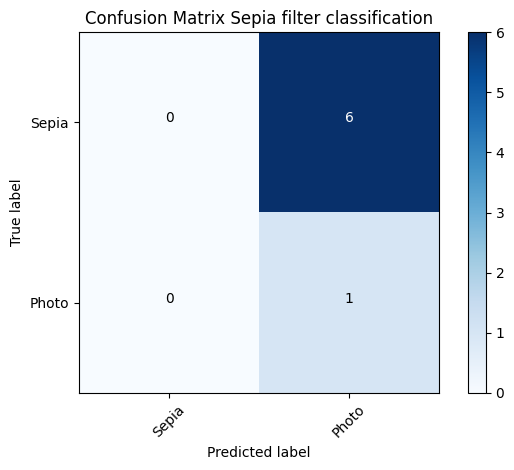

acc:  0.14285714285714285
precision:  1.0
recall:  0.14285714285714285


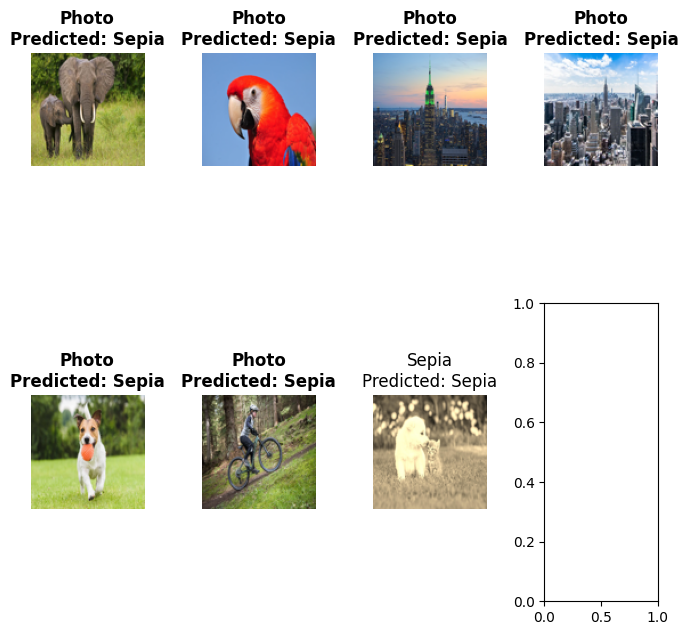

In [17]:
from sklearn import neural_network

classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5, ), activation='relu', max_iter=1000, solver='sgd', verbose=10, random_state=1, learning_rate_init=0.0001)

# training(classifier, trainInputsNormalised, trainOutputs)
classifier.fit(trainInputsFlatten, trainOutputs)

predictedLabels = classifier.predict(testInputsFlatten)

acc, prec, recall, cm = calculatePerformance(np.array(testOutputs), predictedLabels)
cm = np.array(cm)
plotConfusionMatrix(cm, ["Sepia", "Photo"], "Sepia filter classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

n = 2
m = 4
fig, axes = plt.subplots(n, m, figsize = (7, 7))
fig.tight_layout() 
for i in range(0, n):
    for j in range(0, m):
        if m * i + j < len(testInputs):
          axes[i][j].imshow(testInputs[m * i + j])
          if (testOutputs[m * i + j] == predictedLabels[m * i + j]):
              font = 'normal'
          else:
              font = 'bold'
          axes[i][j].set_title(str(testOutputs[m * i + j]) + '\nPredicted: ' + str(predictedLabels[m * i + j]), fontweight=font)
          axes[i][j].set_axis_off()

plt.show()